<a href="https://colab.research.google.com/github/HKubinhetz/DS-ProgrammingLanguages/blob/main/Programming_Languages_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df_path = "/content/drive/MyDrive/PythonDS/02 - Programming Languages/QueryResults 2022.csv" 
df_columns = ['DATE', 'TAG', 'POSTS']

df = pd.read_csv(
    filepath_or_buffer=df_path,     # Path
    names=df_columns,               # Columns
    header=0                        # Overwriting existing columns
)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,164


In [ ]:
df.tail()

,DATE,TAG,POSTS
2281,2022-04-01 00:00:00,php,4110
2282,2022-04-01 00:00:00,python,24505
2283,2022-04-01 00:00:00,r,4868
2284,2022-04-01 00:00:00,ruby,499
2285,2022-04-01 00:00:00,swift,1867


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2286, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

DATE     2286
TAG      2286
POSTS    2286
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby(by="TAG").sum().sort_values(by="POSTS", ascending=False)


,POSTS
TAG,
javascript,2363172
python,1933050
java,1839168
c#,1533404
php,1432627
c++,761737
r,445682
c,378134
swift,311668


In [ ]:
top_language_entries = df.groupby(by="TAG").sum().sort_values(by="POSTS", ascending=False).iloc[0].name
num_of_posts = df.groupby(by="TAG").sum().sort_values(by="POSTS", ascending=False).iloc[0]["POSTS"]
print(f"The language with the highest number of posts is {top_language_entries}, with {num_of_posts} entries!")

The language with the highest number of posts is javascript, with 2363172 entries!


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby(by="TAG").count().sort_values(by="POSTS", ascending=False)

,DATE,POSTS
TAG,,
c#,166,166
assembly,165,165
c,165,165
c++,165,165
delphi,165,165
java,165,165
javascript,165,165
perl,165,165
php,165,165


In [ ]:
top_language_months = df.groupby(by="TAG").count().sort_values(by="POSTS", ascending=False).iloc[0].name
num_of_months = df.groupby(by="TAG").count().sort_values(by="POSTS", ascending=False).iloc[0]["POSTS"]
print(f"The language with the highest number of posts is {top_language_months}, with {num_of_months} entries!")

The language with the highest number of posts is c#, with 166 entries!


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
# Selecting an individual cell and then converting it to Datetime format
print(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


In [4]:
# Converting the entire column to a Datetime format.
df.DATE = pd.to_datetime(df.DATE)

In [ ]:
# Checking the solution
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,164


## Data Manipulation



In [5]:
new_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
new_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,164.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1135.0,638.0,130.0,480.0,537.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1153.0,725.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,580.0,97.0,502.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,284.0,2261.0,5709.0,3863.0,159.0,771.0,7524.0,15260.0,103.0,3722.0,22023.0,3916.0,433.0,1661.0
2022-01-01,240.0,2061.0,5914.0,3890.0,151.0,794.0,7703.0,16267.0,131.0,4010.0,22636.0,4252.0,477.0,1989.0
2022-02-01,226.0,1792.0,5844.0,3488.0,187.0,689.0,7296.0,15481.0,97.0,3729.0,22689.0,4345.0,457.0,1887.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
# Checking the dimensions of our new dataframe:
new_df.shape

(166, 14)

In [ ]:
# Checking the column headers
new_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
# Checking the first five rows
new_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,164.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1135.0,638.0,130.0,480.0,537.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1153.0,725.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,580.0,97.0,502.0,452.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [6]:
# Counting the number of entries per programming language
new_df.count()
# CHECK HERE, this value doesn't match the first count! It is equal to the nu

TAG
assembly      165
c             165
c#            166
c++           165
delphi        165
go            150
java          165
javascript    165
perl          165
php           165
python        165
r             163
ruby          165
swift         157
dtype: int64

In [ ]:
# Filling NaN data with zeroes.
new_df = new_df.fillna(0)
new_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,121.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1135.0,638.0,130.0,480.0,537.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1989.0,810.0,112.0,0.0,1153.0,725.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0


In [ ]:
# Checking if there are NaN values in the dataframe
new_df.isna().any()

TAG
assembly      False
c             False
c#            False
c++           False
delphi        False
go            False
java          False
javascript    False
perl          False
php           False
python        False
r             False
ruby          False
swift         False
dtype: bool

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
new_df.java

DATE
2008-07-01       0.0
2008-08-01     222.0
2008-09-01    1135.0
2008-10-01    1153.0
2008-11-01     957.0
               ...  
2021-12-01    7524.0
2022-01-01    7703.0
2022-02-01    7296.0
2022-03-01    8164.0
2022-04-01    8165.0
Name: java, Length: 166, dtype: float64

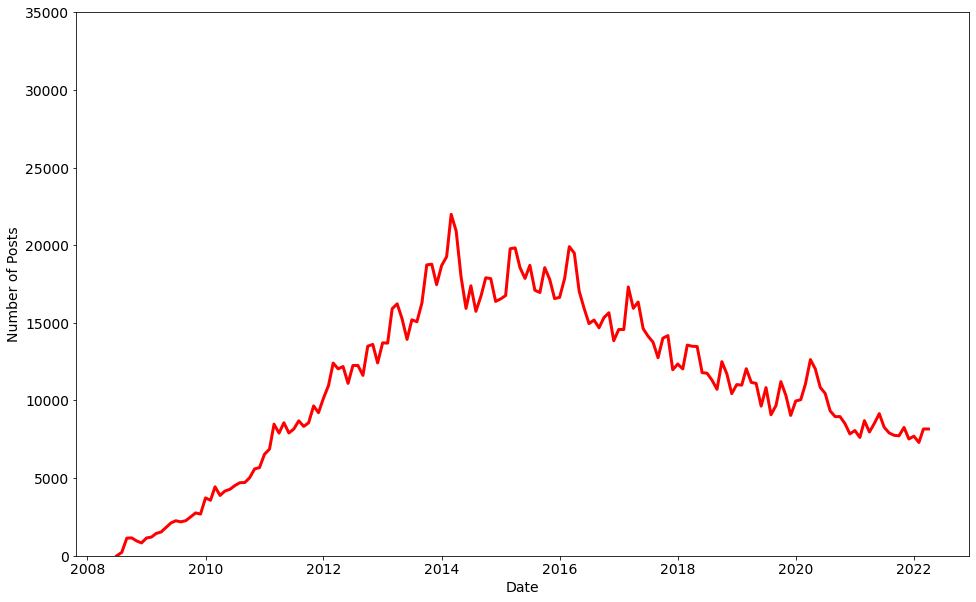

In [ ]:
# Plotting a pretty line chart!

# Chart sizing
plt.figure(figsize=(16,10)) 

# Axis fonts
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Axis limits
plt.ylim(0, 35000)

# Axis labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# Plotting
plt.plot(new_df.index, new_df.java, color="red", linewidth=3)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

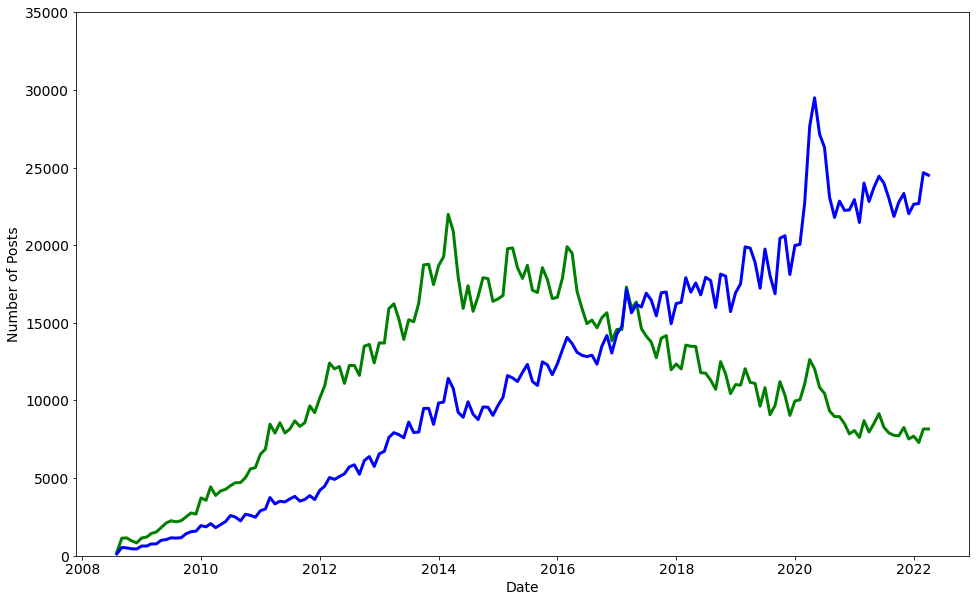

In [8]:
# Plotting a two line chart

# Chart sizing
plt.figure(figsize=(16,10)) 

# Axis fonts
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Axis limits
plt.ylim(0, 35000)

# Axis labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

plt.plot(new_df.index, new_df.java, color="green", linewidth=3)
plt.plot(new_df.index, new_df.python, color="blue", linewidth=3)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one observation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 